# Question 3A: Eulers Forward  and Backwards Methods

The more general form of a first order Ordinary Differential Equation is: $$ y′=f(x,y) $$
 
This can be solved analytically by integrating both sides but this is not straight forward for most problems. Numerical methods can be used to approximate the solution at discrete points.

$$ y' = f(x,y) = xe^{-x} - y $$ 

Initial Condition $ y(0) = 1 $

Boundary $ 0 \le x \le 10 $

Step Size $ h = 0.1 $

Actual Solution $ y(x) = e^{-x}(1 + 0.5x^2) $





In [1]:
## Library
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")
class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

## Defining the Function

In [3]:
def myfun_xy(x,y):
    return (x*math.exp(-x) -y)


## Discrete Interval 
Here we will use two different steps sizes on the  $ 0 \leq x \leq 10 $.
### Interval
The step Size will be $h = 0.1$

with the discrete time steps,
$$ x_{i} = 0 + i0.1 $$
for  $i=0,1,...,100$.

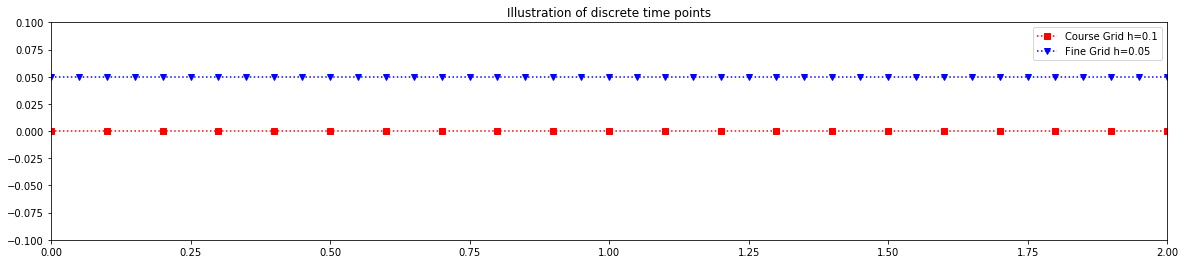

In [25]:
# Start and end of interval
b=10
a=0
# Steps N1=400
N1=100
N2=200
h1=0.1
h2=0.05

x1=np.arange(a,b+h1,h1)
x2=np.arange(a,b+h2,h2)

fig = plt.figure(figsize=(20,4))
plt.plot(x1,0*x1,'s:',color='red',label='Course Grid h=%s'%(h1))
plt.plot(x2,0*x2+.05,'v:',color='blue',label='Fine Grid h=%s'%(h2))

plt.xlim((0,2))
plt.ylim((-0.1,0.1))
plt.title('Illustration of discrete time points')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Analytic (Exact) solution')

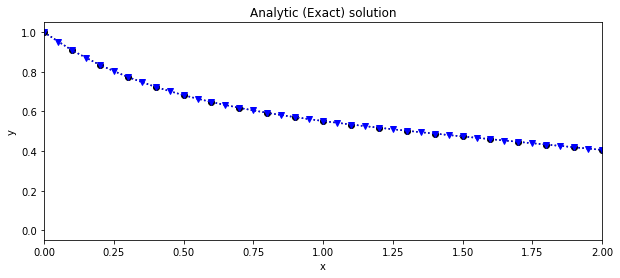

In [34]:
## Analytic Solution y
y1=np.exp(-x1)*(0.5*x1**2 + 1)
y2=np.exp(-x2)*(0.5*x2**2 + 1)

fig = plt.figure(figsize=(10,4))
plt.plot(x1,y1,'o:',color='black')
plt.plot(x2,y2,'v:',color='blue')
plt.xlim((0,2))
plt.xlabel('x')
plt.ylabel('y')

plt.title('Analytic (Exact) solution')

## Setting up the inital Conditions
$$ w_{0} = 2 $$

In [27]:
IC=1 # Intial condtion
w1 = np.zeros(N1+1)
v1 = np.zeros(N1+1)
v1bar = np.zeros(N1+1)
w1[0]=IC
v1bar[0]=IC
v1[0]=IC

w2 = np.zeros(N2+1)
v2 = np.zeros(N2+1)
v2bar = np.zeros(N2+1)
w2[0]=IC
v2bar[0]=IC
v2[0]=IC

## Forward Euler
Assuming uniform stepsize  $x_{i+1} − x_{i}$ is replaced by  h, re-arranging the equation gives:
$$ w_{i+1} = w_{i} + hf(x_{i}, w_{i}) $$

This can be read as the future  $w_{i+1} $ can be approximated by the present  $w_{i}$ and the addition of the input to the system  $f(x,y)$ times the time step.

## Backward Euler
Backwards Euler is an implicit method
$$ vbar_{i+1} = v_{i} + hf(x_{i}, v_{i}) $$
$$ v_{i+1} = v_{i} + hf(x_{i+1}, vbar_{i+1}) $$


Text(0.5, 1.0, 'Analytic and Euler solution')

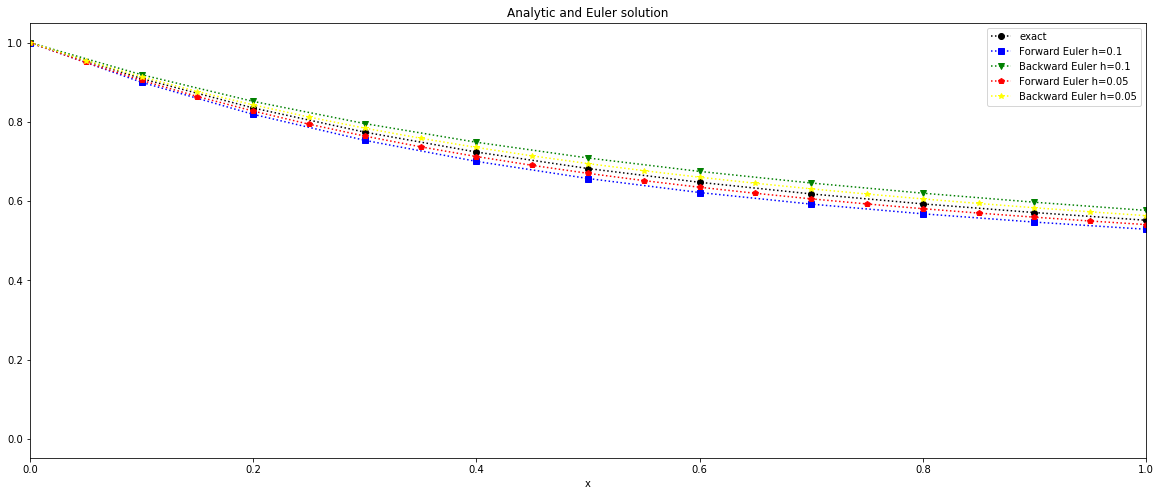

In [35]:

for i in range (0,N1):
    w1[i+1]=w[i]+h1*myfun_xy(x1[i], w1[i])
    v1bar[i+1]=v1[i]+h1*myfun_xy(x1[i], v1[i])
    v1[i+1]=v1[i]+h1*myfun_xy(x1[i+1], v1bar[i+1])

for i in range (0,N2):
    w2[i+1]=w2[i]+h2*myfun_xy(x2[i], w2[i])
    v2bar[i+1]=v2[i]+h2*myfun_xy(x2[i], v2[i])
    v2[i+1]=v2[i]+h2*myfun_xy(x2[i+1], v2bar[i+1])
    

fig = plt.figure(figsize=(20,8))
plt.plot(x1,y1,'o:',color='black',label='exact')
plt.plot(x1,w1,'s:',color='blue',label='Forward Euler h=0.1')
plt.plot(x1,v1,'v:',color='green',label='Backward Euler h=0.1')
plt.plot(x2,w2,'p:',color='red',label='Forward Euler h=0.05')
plt.plot(x2,v2,'*:',color='yellow',label='Backward Euler h=0.05')
plt.xlim((0,1))
plt.xlabel('x')
plt.legend(loc='best')
plt.title('Analytic and Euler solution')

In [37]:
table = ListTable()
table.append(['x', 'w1 FE h=0.1', 'v1 BE h=0.1', 'Exact',
              'FE Err 0.1', 'BE Err 0.1', '% Err FE 0.1', '% Err BE 0.1'])
tableSize = 10
for i in range (0,tableSize+1):
    table.append([round(x1[i],3), round(w1[i],3), round(v1[i],3), round(y1[i],3),
                  round(abs(y1[i]-w1[i]),5), round(abs(y1[i]-v1[i]),5),
                 round(abs(y1[i]-w1[i])/abs(y1[i])*100,5), round(abs(y1[i]-v1[i])/abs(y1[i])*100,5)])
    
table.append(['Max',' ' ,' ' 
              , ' ', round(max(abs(y1-w1)),5), round(max(abs(y1-v1)),5)])
table

x,w1 FE h=0.1,v1 BE h=0.1,Exact,FE Err 0.1,BE Err 0.1,% Err FE 0.1,% Err BE 0.1
0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
0.1,0.9,0.919,0.909,0.00936,0.00969,1.02947,1.06523
0.2,0.819,0.852,0.835,0.01606,0.0167,1.92275,1.99956
0.3,0.754,0.796,0.774,0.02064,0.02157,2.66573,2.78672
0.4,0.7,0.749,0.724,0.02355,0.02476,3.25367,3.41982
0.5,0.657,0.709,0.682,0.02518,0.02662,3.69056,3.90099
0.6,0.622,0.675,0.648,0.02582,0.02746,3.98752,4.23978
0.7,0.593,0.646,0.618,0.02572,0.02752,4.16059,4.45111
0.8,0.568,0.62,0.593,0.02508,0.027,4.22852,4.55301
0.9,0.547,0.597,0.571,0.02405,0.02607,4.21077,4.5646


In [39]:
table2 = ListTable()
table2.append(['x', 'w1 FE h=0.05', 'v1 BE h=0.05', 'Exact',
              'FE Err 0.05', 'BE Err 0.05', '% Err FE 0.05', '% Err BE 0.05'])
tableSize = 10
for i in range (0,tableSize+1):
    table2.append([round(x2[i],3), round(w2[i],3), round(v2[i],3), round(y2[i],3),
                  round(abs(y2[i]-w2[i]),5), round(abs(y2[i]-v2[i]),5),
                 round(abs(y2[i]-w2[i])/abs(y2[i])*100,5), round(abs(y2[i]-v2[i])/abs(y2[i])*100,5)])
    
table2.append(['Max',' ' ,' ' 
              , ' ', round(max(abs(y2-w2)),5), round(max(abs(y2-v2)),5)])
table2

x,w1 FE h=0.05,v1 BE h=0.05,Exact,FE Err 0.05,BE Err 0.05,% Err FE 0.05,% Err BE 0.05
0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
0.05,0.95,0.955,0.952,0.00242,0.00246,0.25393,0.25825
0.1,0.905,0.914,0.909,0.00448,0.00457,0.49304,0.50201
0.15,0.864,0.877,0.87,0.00623,0.00635,0.71607,0.72994
0.2,0.827,0.843,0.835,0.0077,0.00786,0.92199,0.94097
0.25,0.794,0.812,0.803,0.00892,0.00911,1.11009,1.1343
0.3,0.764,0.784,0.774,0.00991,0.01014,1.2799,1.30943
0.35,0.737,0.759,0.748,0.0107,0.01096,1.43126,1.46612
0.4,0.713,0.736,0.724,0.01132,0.01162,1.56425,1.60441
0.45,0.69,0.714,0.702,0.01179,0.01211,1.67923,1.72459
